In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import CalculatedFieldSubroutines as cfs

from pandasgui import show

import os

import warnings

In [3]:
warnings.filterwarnings( 'ignore' )

In [4]:
def origin_dir():

    home_dir_list = os.listdir( '/home' )

    for dir in home_dir_list:

        if '_linux' in dir:

            path = f'/home/{dir}/Desktop/TDMprivate'

            if not os.path.exists( path ):

                raise Exception( 'TDMprivate folder does not exist. TDMprivate folder must exist on Desktop. Notify Ryan or ' +
                                 'Vincent if this message appears.' )

            else:

                return path

In [8]:
metadata_df = pd.read_csv( f'{ origin_dir() }/metadata/metadata.csv' )

In [9]:
red_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Red' ][ 'groupMetadataID' ].tolist()

green_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Green' ][ 'groupMetadataID' ].tolist() 

blue_route_gmID_list  = metadata_df[ metadata_df[ 'Route' ] == 'Blue' ][ 'groupMetadataID' ].tolist() 

In [12]:
best_pose_file_string = '_apollo_sensor_gnss_best_pose'

#

red_route_best_pose_df_list = []

for gmID in red_route_gmID_list:

    current_gmID_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ best_pose_file_string }/{ gmID + best_pose_file_string }.csv' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    red_route_best_pose_df_list.append( current_gmID_best_pose_df )

green_route_best_pose_df_list = []

for gmID in green_route_gmID_list:

    current_gmID_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ best_pose_file_string }/{ gmID + best_pose_file_string }.csv' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    green_route_best_pose_df_list.append( current_gmID_best_pose_df )

blue_route_best_pose_df_list = []

for gmID in blue_route_gmID_list:

    current_gmID_best_pose_df = pd.read_csv( f'{ origin_dir() }/data/{ gmID }/{ best_pose_file_string }/{ gmID + best_pose_file_string }.csv' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )

    blue_route_best_pose_df_list.append( current_gmID_best_pose_df )

In [13]:
red_route_best_pose_df_list[ 0 ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   groupMetadataID    1658 non-null   object 
 1   latitudeStdDev     1658 non-null   float64
 2   longitude          1658 non-null   float64
 3   time               1658 non-null   int64  
 4   latitude           1658 non-null   float64
 5   longitudeStdDev    1658 non-null   float64
 6   numSatsInSolution  1658 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 90.8+ KB


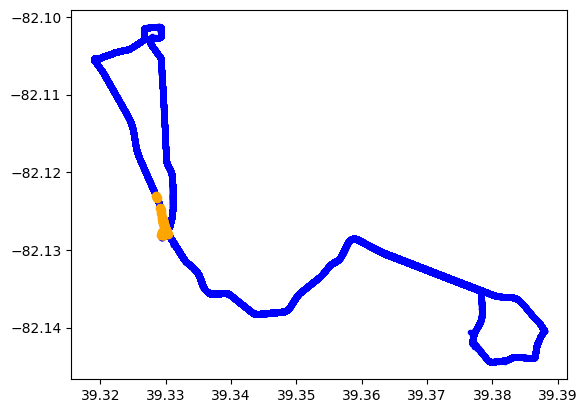

In [18]:
start_latitude_array = []

start_longitude_array = []

for df in blue_route_best_pose_df_list:

    latitude_array = np.array( df[ 'latitude' ] )

    longitude_array = np.array( df[ 'longitude' ] )

    start_latitude_array.append( latitude_array[ 0 ] )

    start_longitude_array.append( longitude_array[ 0 ] )

    plt.plot( latitude_array, longitude_array, color = 'blue', marker = '.' )

plt.plot( start_latitude_array, start_longitude_array, color = 'orange', marker = 'o', ls = '' )

plt.show()